# Tests Run with 6 fragments and 256 block length and distributed parity = True
# Run in WSL on a Intel i5-2500K CPU @ 3.30GHz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Open the files and get the data
fileNames = ["1MB.txt", "2MB.txt", "4MB.txt", "8MB.txt", "16MB.txt", "32MB.txt", "64MB.txt", "128MB.txt", "256MB.txt", "512MB.txt", "1024MB.txt"]
averages = []

# data format: [encrypt, fragment, defragment, decrypt]

for file in fileNames:
    with open(file, "r") as f:
        data = f.read()
        data = data.split("\n")
        data = data[:-1]

        # parse numbers from data
        for i in range(len(data)):
            data[i] = data[i].split(", ")
            data[i] = [int(x) for x in data[i]]

    # calculate averages by column
    averages.append([])
    for i in range(len(data[0])):
        averages[-1].append(sum([x[i] for x in data]) / len(data))


print(averages)

[[14.22, 38.76, 11.42, 15.64], [27.38, 69.36, 22.82, 30.7], [51.74, 148.78, 45.58, 57.4], [97.26, 281.78, 90.66, 110.16], [188.08, 560.08, 181.58, 226.5], [400.66, 1145.54, 380.98, 515.08], [773.56, 2469.84, 783.3, 960.02], [1614.66, 5150.96, 1462.0, 1915.28], [3234.2, 9832.34, 2992.68, 3767.28], [7599.7, 21486.7, 6005.18, 8217.86], [15203.42, 35962.18, 10981.34, 15279.4]]


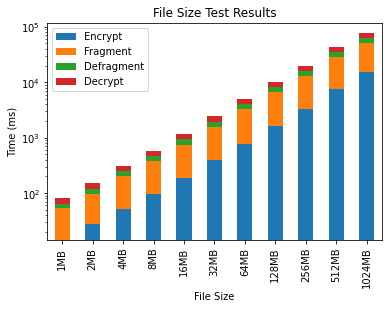

In [48]:
df = pd.DataFrame(averages)
df.columns = ["Encrypt", "Fragment", "Defragment", "Decrypt"]
df.index = ["1MB", "2MB", "4MB", "8MB", "16MB", "32MB", "64MB", "128MB", "256MB", "512MB", "1024MB"]
# crete a stacked bar chart

df.plot.bar(stacked=True)

plt.xlabel("File Size")
plt.ylabel("Time (ms)")
plt.title("File Size Test Results")
plt.yscale("log")
plt.show()
